<a href="https://colab.research.google.com/github/blowmeaway1234/Artificial-Intelligence/blob/main/AI_WEEK_7_HOMEWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARY

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

# Housing.csv

 View data

In [83]:
url ='Housing.csv'
data = pd.read_csv(url)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


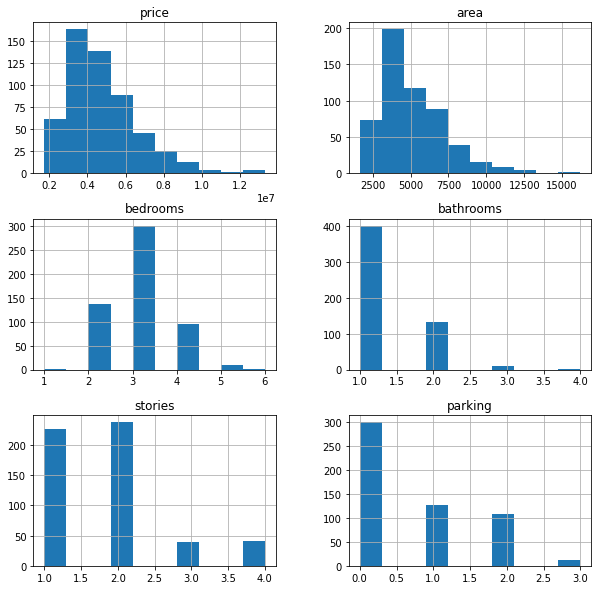

In [84]:
data.hist(figsize=(10,10))
plt.show()

In [85]:
correlation=data.corr()
print(correlation)

              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


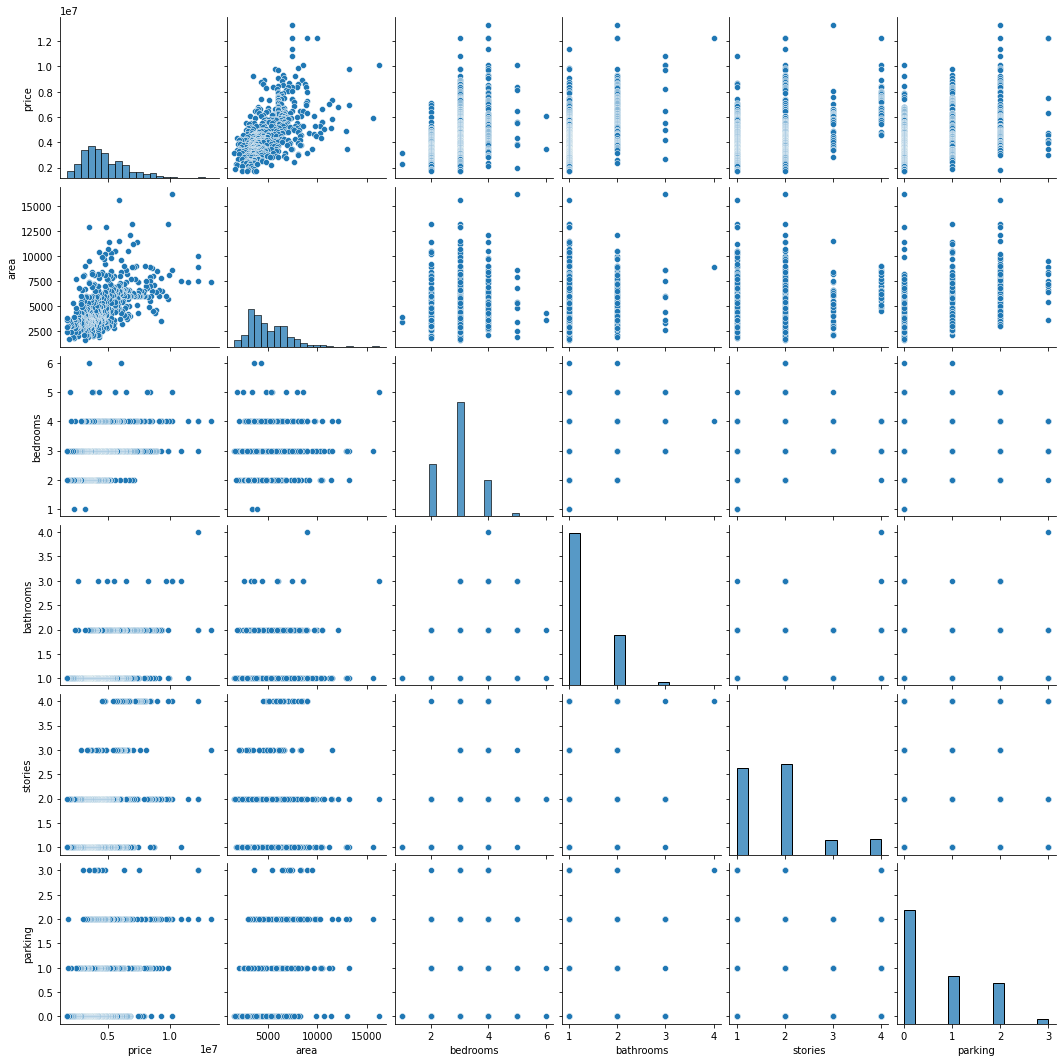

In [94]:
sns.pairplot(data)

<Axes: >

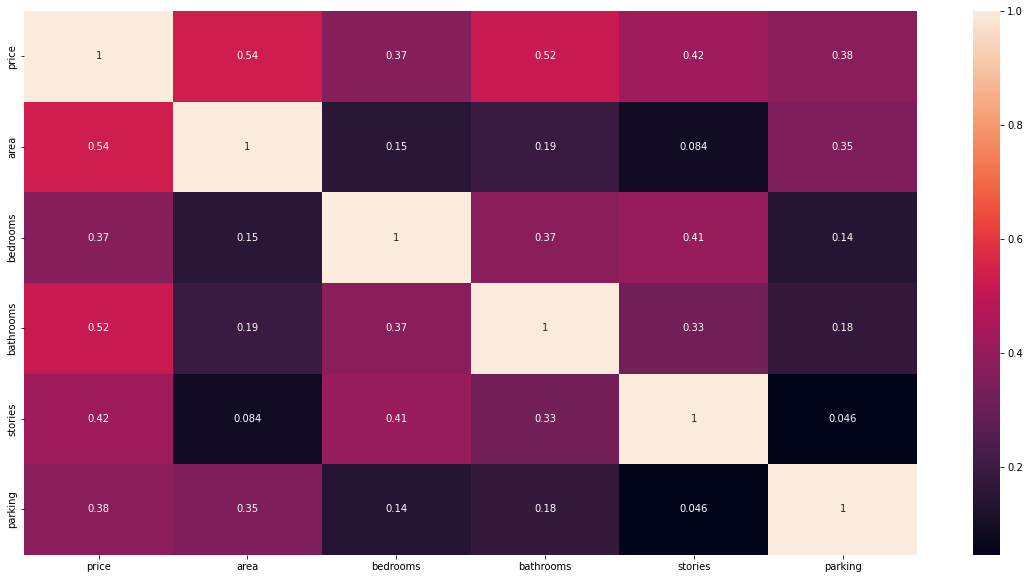

In [87]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation,annot=True)

Machine Learning model

In [88]:
# Model Linear Regression
model = linear_model.LinearRegression()
# Teaching Machine
model.fit(X = pd.DataFrame(data['area']), y = data['price'])
print('Hệ số intercept là: ',model.intercept_)
print('Hệ số coefient là: ', model.coef_)

Hệ số intercept là:  2387308.48239643
Hệ số coefient là:  [461.97489427]


In [89]:
model.score(X = pd.DataFrame(data['area']), y = data['price'])

0.2872931546811469

In [90]:
y_pred=model.predict(X = pd.DataFrame(data['area']))
print(y_pred)

[5815162.19790048 6526603.53508057 6988578.42935335 5852120.18944231
 5815162.19790048 5852120.18944231 6351053.07525691 9871301.76961552
 6129305.12600598 5043664.12446493 8485377.08679717 5159157.84803313
 5413244.03988316 4004220.61235117 5990712.65772414 5159157.84803313
 5436342.7845968  6314095.08371509 4512392.99605123 5353187.3036277
 4383040.02565485 5692738.8509182  6106206.38129234 4493914.00028032
 6452687.55199692 5408624.29094043 5159157.84803313 6487335.66906738
 6060008.89186506 4928170.40089674 5840570.81708549 5621132.74230591
 4641745.96644761 5140678.85226222 5547216.75922227 5621132.74230591
 5843804.6413454  6545082.53085148 5159157.84803313 5159157.84803313
 5413244.03988316 5325468.80997133 5380905.79728407 5159157.84803313
 5159157.84803313 5159157.84803313 5159157.84803313 5436342.7845968
 4373800.5277694  5824401.69578594 5824401.69578594 5309299.68867178
 5159157.84803313 4766479.18790126 5159157.84803313 5159157.84803313
 7672301.27287707 6545082.53085148 5

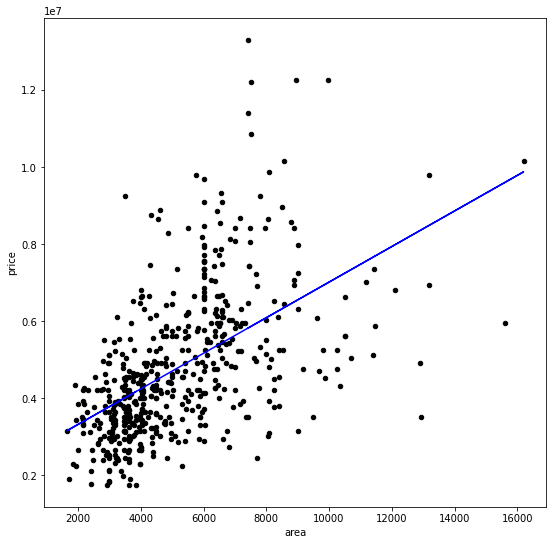

In [93]:
data.plot(kind='scatter',
          x='area',
          y='price',
          figsize=(9,9),
          color='black',
          )

plt.plot(data['area'],
         y_pred,
         color='blue')

In [156]:
model=linear_model.LinearRegression()
X=pd.DataFrame([data['area'],data['area']**2,data['area']**3,data['area']**4]).T
model.fit(X, y = data['price'])
print('Intercept của mô hình:',model.intercept_)
print('Coeffient của mô hình:',model.coef_)
print('Độ chỉnh xác của mô hình:',model.score(X, y = data['price']))

Intercept của mô hình: 4765060.861442321
Coeffient của mô hình: [-1.87292314e+03  6.60296224e-01 -6.69919196e-05  2.12779050e-09]
Độ chỉnh xác của mô hình: 0.34560934200576077


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


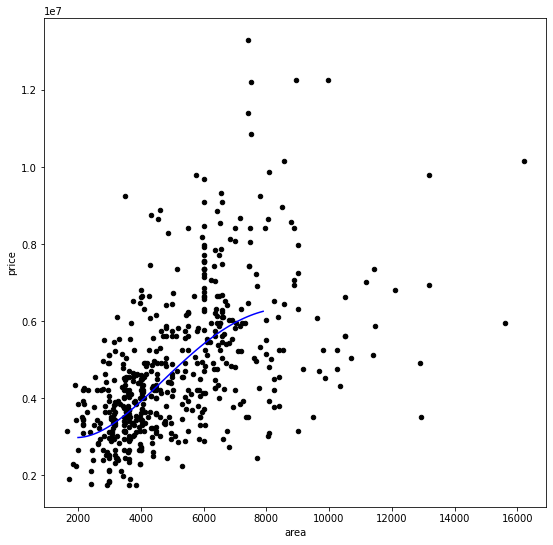

In [157]:
range=np.arange(2000,8000,100)
x_range=pd.DataFrame([100+range,range**2,range**3,range**4]).T
y_pred=model.predict(X=x_range)
data.plot(kind='scatter',
          x='area',
          y='price',
          figsize=(9,9),
          color='black',
          )
plt.plot(range,y_pred,color='blue')

In [152]:
# tăng độ chính xác bằng cách thêm biến
model=linear_model.LinearRegression()
model.fit(X=data.loc[:,['area','bedrooms','bathrooms','stories','parking']],y=data['price'])
print('Intercept:',model.intercept_)
print('Coefficient:',model.coef_)
print('Accuracy:',model.score(X=data.loc[:,['area','bedrooms','bathrooms','stories','parking']],y=data['price']))


Intercept: -145734.4894558806
Coefficient: [3.31115495e+02 1.67809788e+05 1.13374016e+06 5.47939810e+05
 3.77596289e+05]
Accuracy: 0.5615825438679802


# USA_Housing.csv

View data

In [178]:
url ='USA_Housing.csv'
data = pd.read_csv(url)
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


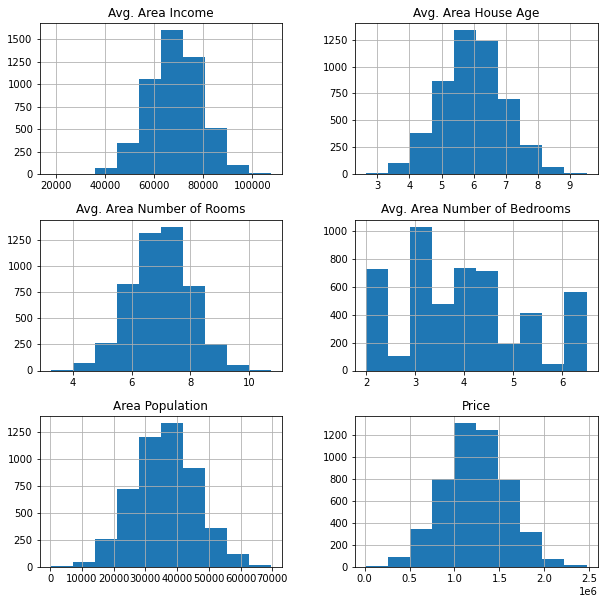

In [179]:
data.hist(figsize=(10,10))
plt.show()

In [180]:
correlation=data.corr()
print(correlation)

                              Avg. Area Income  Avg. Area House Age  \
Avg. Area Income                      1.000000            -0.002007   
Avg. Area House Age                  -0.002007             1.000000   
Avg. Area Number of Rooms            -0.011032            -0.009428   
Avg. Area Number of Bedrooms          0.019788             0.006149   
Area Population                      -0.016234            -0.018743   
Price                                 0.639734             0.452543   

                              Avg. Area Number of Rooms  \
Avg. Area Income                              -0.011032   
Avg. Area House Age                           -0.009428   
Avg. Area Number of Rooms                      1.000000   
Avg. Area Number of Bedrooms                   0.462695   
Area Population                                0.002040   
Price                                          0.335664   

                              Avg. Area Number of Bedrooms  Area Population  \
Avg. Area

<Axes: >

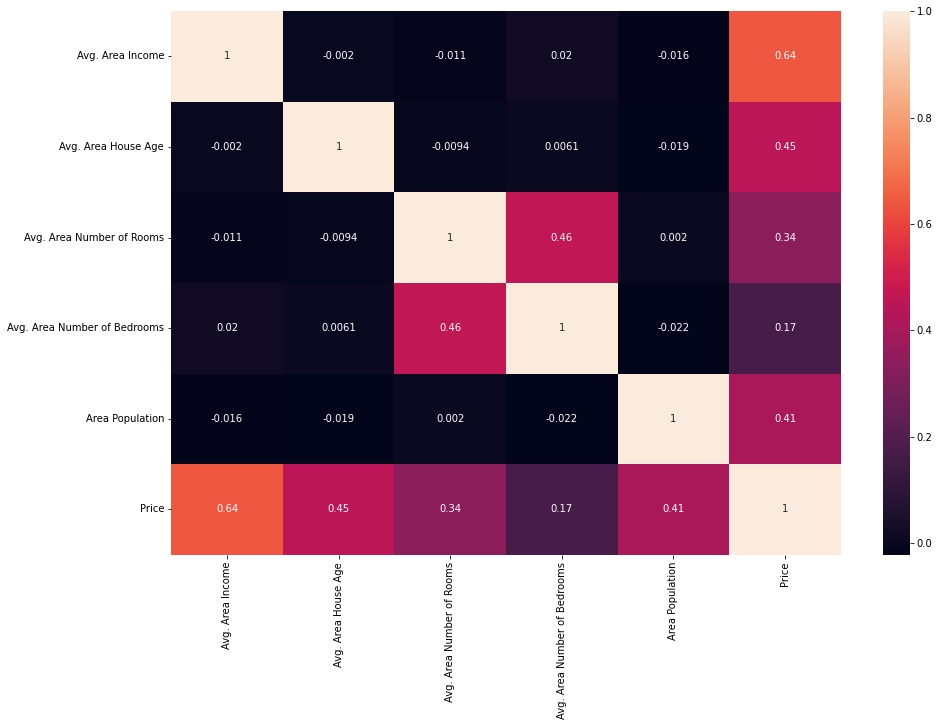

In [181]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True)

In [182]:
#sns.pairplot(data)

Machine learning model

In [189]:
model=linear_model.LinearRegression()
X=pd.DataFrame([data['Avg. Area Income'],data['Avg. Area Income']**2,data['Avg. Area Income']**3]).T
model.fit(X, y = data['Price'])
print('Intercept của mô hình:',model.intercept_)
print('Coeffient của mô hình:',model.coef_)
print('Độ chỉnh xác của mô hình:',model.score(X, y = data['Price']))

Intercept của mô hình: -90874.44992992934
Coeffient của mô hình: [ 1.88774722e+01 -1.79963602e-05  3.32345038e-10]
Độ chỉnh xác của mô hình: 0.409792512563658


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


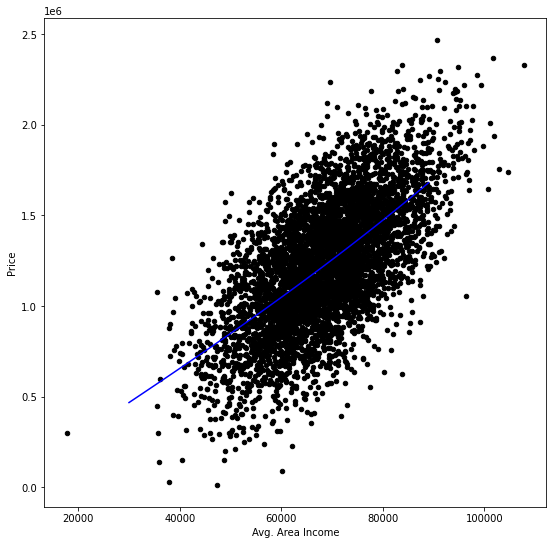

In [198]:
range=np.arange(30000,90000,1000)
x_range=pd.DataFrame([range,range**2,range**3]).T
y_pred=model.predict(X=x_range)
data.plot(kind='scatter',
          x='Avg. Area Income',
          y='Price',
          figsize=(9,9),
          color='black',
         )
plt.plot(range,y_pred,color='blue')

# bodyfat.csv

In [210]:
url ='bodyfat.csv'
data = pd.read_csv(url)
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


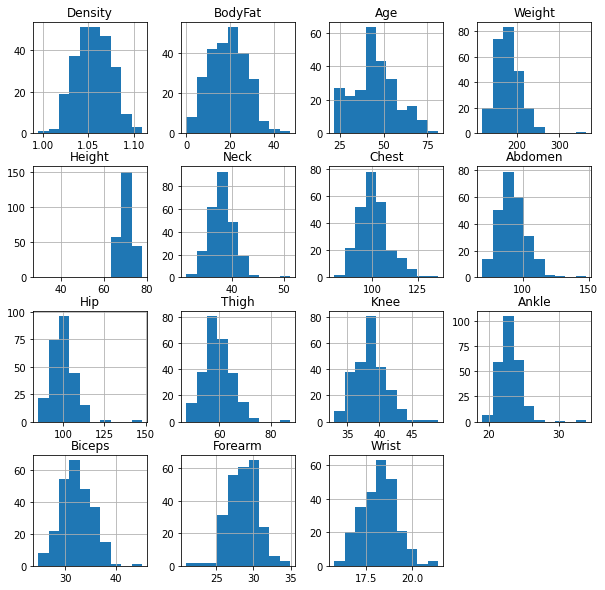

In [211]:
data.hist(figsize=(10,10))
plt.show()

In [212]:
correlation=data.corr()
print(correlation)

          Density   BodyFat       Age    Weight    Height      Neck     Chest  \
Density  1.000000 -0.987782 -0.277637 -0.594062  0.097881 -0.472966 -0.682599   
BodyFat -0.987782  1.000000  0.291458  0.612414 -0.089495  0.490592  0.702620   
Age     -0.277637  0.291458  1.000000 -0.012746 -0.171645  0.113505  0.176450   
Weight  -0.594062  0.612414 -0.012746  1.000000  0.308279  0.830716  0.894191   
Height   0.097881 -0.089495 -0.171645  0.308279  1.000000  0.253710  0.134892   
Neck    -0.472966  0.490592  0.113505  0.830716  0.253710  1.000000  0.784835   
Chest   -0.682599  0.702620  0.176450  0.894191  0.134892  0.784835  1.000000   
Abdomen -0.798955  0.813432  0.230409  0.887995  0.087813  0.754077  0.915828   
Hip     -0.609331  0.625201 -0.050332  0.940884  0.170394  0.734958  0.829420   
Thigh   -0.553091  0.559608 -0.200096  0.868694  0.148436  0.695697  0.729859   
Knee    -0.495040  0.508665  0.017516  0.853167  0.286053  0.672405  0.719496   
Ankle   -0.264890  0.265970 

<Axes: >

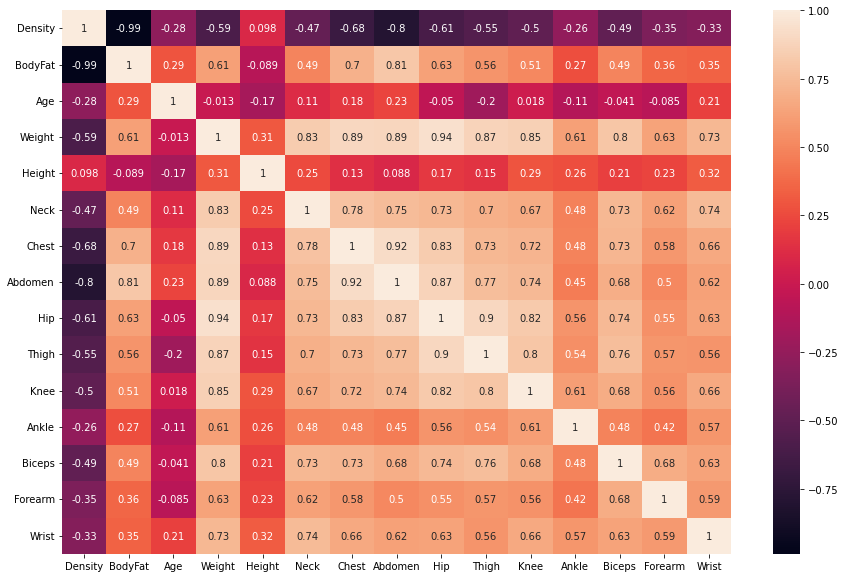

In [213]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True)

In [214]:
#sns.pairplot(data)

In [226]:

model=linear_model.LinearRegression()
X=pd.DataFrame([data['Forearm'],data['Forearm']**2,data['Forearm']**3]).T
model.fit(X, y = data['BodyFat'])
print('Intercept của mô hình:',model.intercept_)
print('Coeffient của mô hình:',model.coef_)
print('Độ chỉnh xác của mô hình:',model.score(X, y = data['BodyFat']))

Intercept của mô hình: 1319.579620058701
Coeffient của mô hình: [-1.43733853e+02  5.19755943e+00 -6.15935535e-02]
Độ chỉnh xác của mô hình: 0.17702286472620643


In [227]:
model.score(X = pd.DataFrame(data['Forearm'],data['Forearm']**2,data['Forearm']**3), y = data['BodyFat'])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: ignored

In [ ]:
data.plot(kind='scatter',
          x='Forearm',
          y='BodyFat',
          figsize=(9,9),
          color='black',
          xlim=(0,7))

plt.plot(data['Forearm'],
         y_pred,
         color='blue')